Erro máximo: 0.01200000


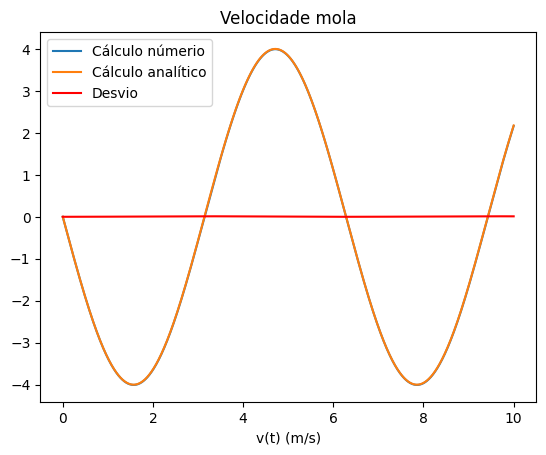

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#mola, nao deve sair
# Valores dados
k = 1
m = 1

# Valores calculados
omega = np.sqrt(k/m)
A = 4
phi = 0

# Parâmetros
dt = 0.001
t0 = 0
tf = 10
x0 = 4
v0 = 0
# Esta função calcula a posição a partir do tempo atual
def pos(t):
    return A * np.cos(omega * t + phi)

# Esta função calcula a aceleração a partir do tempo atual
def accel(t):
    x = pos(t)
    return -k * x / m

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)
t = np.zeros(n + 1)
x = np.zeros(n + 1)
v = np.zeros(n + 1)
a = np.zeros(n + 1)

# Insert initial values
a[0] = accel(t0)
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
    a[i + 1] = accel(t[i])
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    t[i + 1] = t[i] + dt

v_analytic = -A * omega * np.sin(omega * t + phi)
error = np.abs(v_analytic - v)
max_error = np.max(error)

print("Erro máximo: {:.8f}".format(max_error))

plt.plot(t, v, label="Cálculo númerio")
plt.plot(t, v_analytic, label="Cálculo analítico")
plt.plot(t, error, "r", label="Desvio")
plt.xlabel("t (s)")
plt.xlabel("v(t) (m/s)")
plt.title("Velocidade mola")
plt.legend(loc="upper left")
plt.show()

Erro máximo: 0.06433807


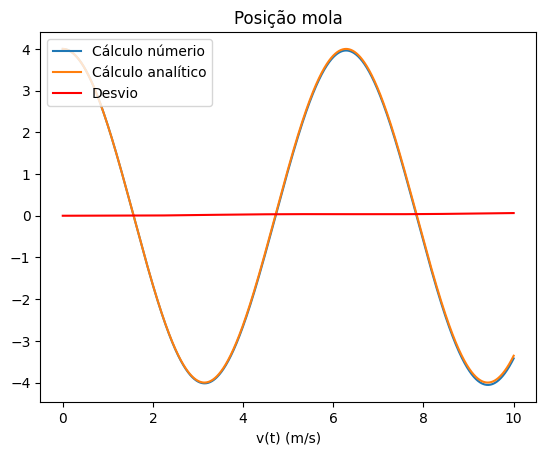

In [8]:
# Já calculamos o movimento com metódo de euler no código
x_analytic = pos(t) # Utilizamos a função posição já definida
x_error = np.abs(x_analytic - x)
x_max_error = np.max(x_error)

print("Erro máximo: {:.8f}".format(x_max_error))

plt.plot(t, x, label="Cálculo númerio")
plt.plot(t, x_analytic, label="Cálculo analítico")
plt.plot(t, x_error, "r", label="Desvio")
plt.xlabel("t (s)")
plt.xlabel("v(t) (m/s)")
plt.title("Posição mola")
plt.legend(loc="upper left")
plt.show()

Erro máximo: 0.01200000


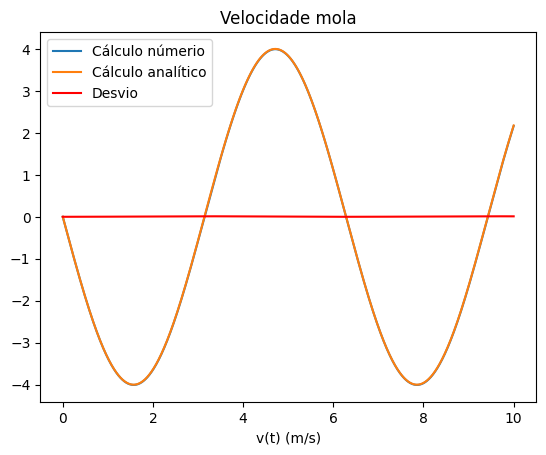

In [9]:
t_cromer = np.zeros(n + 1)
x_cromer = np.zeros(n + 1)
v_cromer = np.zeros(n + 1)
a_cromer = np.zeros(n + 1)

# Insert initial values
a_cromer[0] = accel(t0)
v_cromer[0] = v0
t_cromer[0] = t0
x_cromer[0] = x0

for i in range(n):
    a_cromer[i + 1] = accel(t[i])
    v_cromer[i + 1] = v_cromer[i] + a_cromer[i] * dt
    # Utilizamos v[i + 1] em vez de v[i] para o método de Euler-Cromer
    # Nota: Até agora não fazia diferença se a velocidade era calculada antes
    # ou depois da posição dentro do loop, mas agora que dependemos do valor
    # atual da velocidade este precisa de ser calculado primeiro.
    x_cromer[i + 1] = x_cromer[i] + v_cromer[i + 1] * dt
    t_cromer[i + 1] = t_cromer[i] + dt

error_cromer = np.abs(v_analytic - v_cromer)
max_error_cromer = np.max(error_cromer)

print("Erro máximo: {:.8f}".format(max_error_cromer))

plt.plot(t, v_cromer, label="Cálculo númerio")
plt.plot(t, v_analytic, label="Cálculo analítico")
plt.plot(t, error_cromer, "r", label="Desvio")
plt.xlabel("t (s)")
plt.xlabel("v(t) (m/s)")
plt.title("Velocidade mola")
plt.legend(loc="upper left")
plt.show()